In [1]:
from sympy import *
init_printing()
from IPython.display import display
from sympy.physics.matrices import msigma
from sympy.physics.quantum.dagger import Dagger

# Problema 3

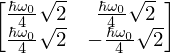

In [2]:
h, B0, w0 = symbols('hbar B_0 omega_0', positive=True, real=True)

H = w0/sqrt(2) * msigma(1)*h/2 + w0/sqrt(2) * msigma(3)*h/2
display(H)
#0.25 

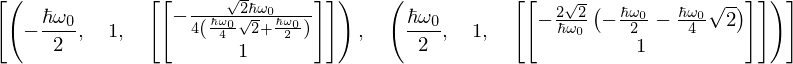

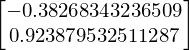

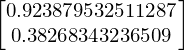

In [3]:
display(H.eigenvects())
vec1 = simplify(H.eigenvects()[0][2][0])
vec2 = simplify(H.eigenvects()[1][2][0])
val1 = simplify(H.eigenvects()[0][0])
val2 = simplify(H.eigenvects()[1][0])
Nsq=simplify(vec1.dot(vec1))
vec1/=sqrt(Nsq)
display(simplify(vec1.evalf()))
Nsq=simplify(vec2.dot(vec2))
vec2/=sqrt(Nsq)
display(simplify(vec2.evalf()))
#0.25
(1/((1-sqrt(2))**2+1)).evalf()

In [4]:
asq, bsq,t = symbols('a^2 b^2 t', positive=True, real=True)
minus = Matrix([[0], [1]])
solve(Eq(minus[0], asq*vec1[0] + bsq*vec2[0]), (asq,bsq))[0][asq]
solve(Eq(minus[1], asq*vec1[1] + bsq*vec2[1]), (asq,bsq))[0][asq]
b = solve(Eq(solve(Eq(minus[0], asq*vec1[0] + bsq*vec2[0]),\
                   (asq,bsq))[0][asq],solve(Eq(minus[1], asq*vec1[1] + bsq*vec2[1]), (asq,bsq))[0][asq]))[0]
a = solve(Eq(minus[1], asq*vec1[1] + bsq*vec2[1]), (asq,bsq))[0][asq].subs(bsq, b)
display((a**2).evalf(),(b**2).evalf())
#Se pueden obtener -hw/2 con probabilidad a**2 y -hw/2 con probabilidad b**2

In [5]:
display(a.evalf(), b.evalf())
print (1/(4-2*sqrt(2))).evalf()

0.853553390593274


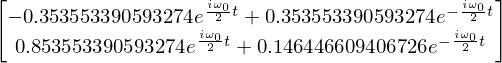

In [6]:
minus_t = exp(-I*val1*t/h)*a*vec1 + exp(-I*val2*t/h)*b*vec2
trigsimp(minus_t.evalf())


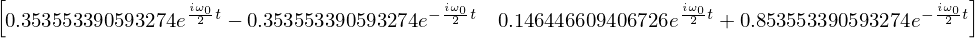

In [7]:
minus_t_dagg=Dagger(minus_t)
display(minus_t_dagg.evalf())

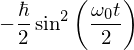

In [8]:
avg_Sx = h/2 * minus_t_dagg*msigma(1)*minus_t
display(simplify(avg_Sx[0].rewrite(sin)))

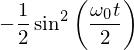

In [9]:
(sin(pi/4)*sin(w0*t/2)**2*1*(sin(pi/8)**2 - cos(pi/8)**2))

# Problema 7

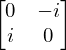

In [16]:
from sympy.physics.quantum import TensorProduct as TP
S1y = h/2 * TP(msigma(2), eye(2))
S1y
msigma(2)

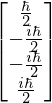

In [80]:
S1y.eigenvects()
S1y*Matrix([[-1], [1], [I], [1]])


In [12]:
a, b, g, d = symbols('alpha beta gamma delta', real=False)
init = Matrix([[a], [b], [g], [d]])
init

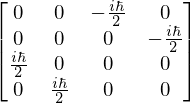

In [81]:
import numpy as np
pp = Matrix([[1], [0], [0], [0]])
pm = Matrix([[0], [1], [0], [0]])
mp = Matrix([[0], [0], [1], [0]])
mm = Matrix([[0], [0], [0], [1]])
es = [pp, pm, mp, mm]
check = MutableMatrix(np.zeros([4,4]))
for i in range(len(pp)):
    for k in range(len(pp)):
        check[i,k] = Dagger(es[i])*S1y*es[k]
display(check)

True


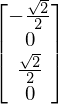

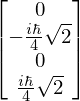

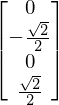

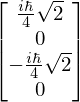

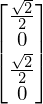

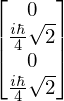

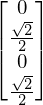

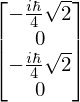

In [45]:
S1x = h/2 * TP(msigma(1), eye(2))
S2y = h/2 * TP(eye(2), msigma(2))
print S1x*S2y==S2y*S1x
simul1 = S1x
simul1.eigenvects()
vecs = []
vecs.append(simul1.eigenvects()[0][2][0])
vecs.append(simul1.eigenvects()[0][2][1])
vecs.append(simul1.eigenvects()[1][2][0])
vecs.append(simul1.eigenvects()[1][2][1])
vals = []
vals.append(simul1.eigenvects()[0][0])
vals.append(simul1.eigenvects()[0][0])
vals.append(simul1.eigenvects()[1][0])
vals.append(simul1.eigenvects()[1][0])
Ps = []
for i in range(len(vecs)):
    vecs[i]/=sqrt((Dagger(vecs[i])*vecs[i])[0])
    display(vals[i], vecs[i])
    display(S2y*vecs[i])
    Ps.append((abs(Dagger(vecs[i])*init)**2)[0])
    #display(abs((Dagger(vecs[i])*init)[0])**2)
#display(simplify(Ps[0]+Ps[1]))


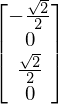

In [47]:
vecs[0]

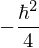

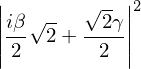

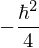

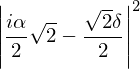

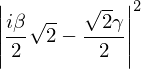

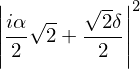

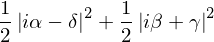

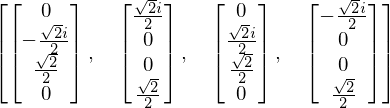

'\ncheck = MutableMatrix(np.zeros([4,4]))\nfor i in range(len(pp)):\n    for k in range(len(pp)):\n        check[i,k] = Dagger(vecs[i])*S1x*vecs[k]\ndisplay(check)\ncheck.eigenvects()'

In [78]:
simul2 = TP(h/2 * msigma(1),h/2 * msigma(2))
#simul2=S2y
simul2.eigenvects()
vecs = []
vecs.append(simul2.eigenvects()[0][2][0])
vecs.append(simul2.eigenvects()[0][2][1])
vecs.append(simul2.eigenvects()[1][2][0])
vecs.append(simul2.eigenvects()[1][2][1])
vals = []
vals.append(simul2.eigenvects()[0][0])
vals.append(simul2.eigenvects()[0][0])
vals.append(simul2.eigenvects()[1][0])
vals.append(simul2.eigenvects()[1][0])
Ps = []
for i in range(len(vecs)):
    display(vals[i])
    vecs[i]/=sqrt((Dagger(vecs[i])*vecs[i])[0])
    Ps.append((abs(Dagger(vecs[i])*init)**2)[0])
    display(abs((Dagger(vecs[i])*init)[0])**2)
display(simplify(Ps[0]+Ps[1]))
display(vecs)
'''
check = MutableMatrix(np.zeros([4,4]))
for i in range(len(pp)):
    for k in range(len(pp)):
        check[i,k] = Dagger(vecs[i])*S1x*vecs[k]
display(check)
check.eigenvects()'''

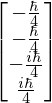

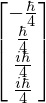

In [79]:
lam = symbols('lamda')
new_vecs = []
new_vecs.append(1/sqrt(2) * (vecs[0]+vecs[1]))
new_vecs.append(1/sqrt(2) * (vecs[0]-vecs[1]))
new_vecs.append(1/sqrt(2) * (vecs[2]+vecs[3]))
new_vecs.append(1/sqrt(2) * (vecs[2]-vecs[3]))
for i in range(4):
    solve(S1x*new_vecs[i]-lam*new_vecs[i])
display(S2y*new_vecs[0])
display(I*h/2 *new_vecs[0])

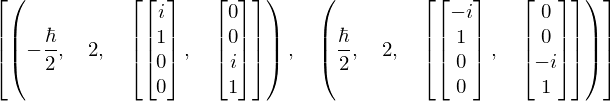

In [119]:
S2y.eigenvects()

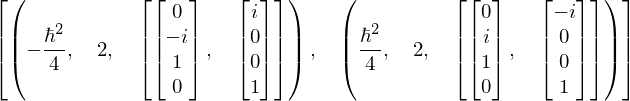

In [27]:
TP(h/2 * msigma(1),h/2 * msigma(2)).eigenvects()

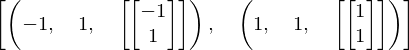

In [49]:
msigma(1).eigenvects()